# Un premier modèle

## Notations

$t$ : temps courant d’estimation de la provision garantie

$P(t) = {G(t), \widetilde{G}(t)}$ : parc roulant à l'instant $t$ ($G(t)$ avec garantie, $\widetilde{G}(t)$ sans garantie)

$\tau$ : horizon de temps de la prévision

$\nu$ : véhicule

$f$ : mois de fabrication

$R(f)$ : ensemble des référentiels techniques au mois de fabrication $f$ : 

$R(f)= \{R_{1}(f);\dots;R_{I}(f)\}$

$R_{i}(f)$ : référentiel technique au mois de fabrication $f$

$\delta_{G}$ : durée du contrat garantie

In [2]:
import random as rd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [32]:
#Fonction pour obtenir des probabilités aléatoires de défauts

def tirage_proba(N):
    list = [rd.randrange(0,10) for k in range(N)]
    list = list/np.sum(list)
    return list

print(tirage_proba(10),sum(tirage_proba(10))) #doc
print(np.cumsum(tirage_proba(10)))

[0.04347826 0.08695652 0.04347826 0.26086957 0.13043478 0.04347826
 0.04347826 0.         0.2173913  0.13043478] 1.0
[0.18181818 0.27272727 0.47727273 0.65909091 0.65909091 0.70454545
 0.84090909 0.84090909 0.97727273 1.        ]


In [29]:
def tirage_cout(N):
    list = [0] + [rd.randrange(50,1000) for k in range(N-1)]
    return list

print(tirage_cout(10))

[0, 906, 623, 798, 607, 254, 739, 732, 349, 347]


In [66]:
N = 60 # nombre de défauts possibles du lot de fabrication 

P1 = tirage_proba(N) #liste des probabilités de défauts pendant l'année 1, P1[0] est la probabilité que la voiture n'est pas de défaut
P2 = tirage_proba(N)
P3 = tirage_proba(N)

C1 = tirage_cout(N) # coûts associés aux défauts durant l'année 1
C2 = tirage_cout(N)
C3 = tirage_cout(N)

print(P1,np.cumsum(P1))

[0.01265823 0.01687764 0.00843882 0.01265823 0.01687764 0.00843882
 0.03797468 0.00843882 0.02953586 0.02109705 0.03797468 0.01687764
 0.02531646 0.03375527 0.01265823 0.02953586 0.02109705 0.00843882
 0.         0.         0.01265823 0.01687764 0.01687764 0.02531646
 0.00843882 0.02109705 0.03375527 0.         0.00421941 0.
 0.         0.         0.02953586 0.02109705 0.03375527 0.01687764
 0.01265823 0.01265823 0.02953586 0.00421941 0.03797468 0.03375527
 0.00421941 0.02109705 0.02953586 0.00421941 0.00421941 0.02953586
 0.00421941 0.01265823 0.01687764 0.02109705 0.01687764 0.00843882
 0.01265823 0.02531646 0.01687764 0.01265823 0.00843882 0.02109705] [0.01265823 0.02953586 0.03797468 0.05063291 0.06751055 0.07594937
 0.11392405 0.12236287 0.15189873 0.17299578 0.21097046 0.2278481
 0.25316456 0.28691983 0.29957806 0.32911392 0.35021097 0.35864979
 0.35864979 0.35864979 0.37130802 0.38818565 0.40506329 0.43037975
 0.43881857 0.45991561 0.49367089 0.49367089 0.4978903  0.4978903
 0.4

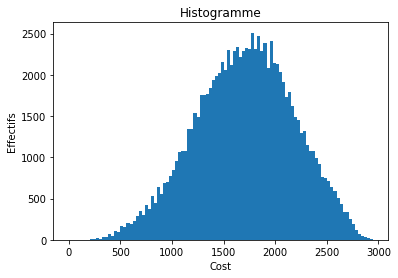

In [67]:
def tirage(P):
    
    P_cumul = np.cumsum(P)
    p = rd.random()
    for k in range(len(P)):
        if p <= P_cumul[k]:
            return k
        
def tirage2(P):
    
    p = rd.random()
    CDF = np.cumsum(P)
    ind = -1
    for i in range(len(CDF-1)):
        if CDF[i] > p:
            return i

        
def simule_traj(P1,P2,P3,C1,C2,C3):
    ind1 = tirage(P1)
    ind2 = tirage(P2)
    ind3 = tirage(P3)
    return C1[ind1]+C2[ind2]+C3[ind3]

def LFGN(n,P1,P2,P3,C1,C2,C3): # n nombre de voitures dans le parc roulant
    histo = []
    for k in range(n):
        histo.append(simule_traj(P1,P2,P3,C1,C2,C3))
    average = np.mean(histo)
    plt.hist(histo,bins=100)
    plt.xlabel('Cost')
    plt.ylabel('Effectifs')
    plt.title('Histogramme')
    plt.show()
    return average


av=LFGN(100000,P1,P2,P3,C1,C2,C3)
    

## Processus de Poisson: (paramètre constant)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Poisson(l,cout,t):
    beta = 1 / l
    nb_panne = 0
    temps_simu = 0
    T = []
    while(temps_simu < t):
        tau = np.random.exponential(beta, size = None)
        temps_simu += tau
        nb_panne += 1
        T.append(tau)
    return nb_panne-1, (nb_panne-1)*cout

Poisson(1,500,10)    

(7, 3500)

In [14]:
def simu_panne(l,cout,t,n):
    liste_nb_panne = []
    liste_cout = []
    for i in range(n):
        p,c = Poisson(l,cout,t)
        liste_cout.append(c)
        liste_nb_panne.append(p)
    return np.mean(liste_nb_panne),np.mean(liste_cout),liste_nb_panne,liste_cout

m1,m2,liste_nb_panne,liste_cout = simu_panne(1,500,10,100)
print(m1,m2,liste_nb_panne,liste_cout)

9.87 4935.0 [12, 11, 16, 14, 8, 10, 11, 16, 11, 9, 6, 8, 9, 9, 10, 5, 6, 9, 12, 11, 6, 12, 5, 11, 10, 5, 7, 16, 9, 10, 11, 12, 9, 10, 9, 8, 6, 10, 7, 6, 8, 14, 10, 11, 6, 9, 11, 11, 15, 7, 10, 15, 7, 8, 9, 6, 15, 9, 6, 9, 6, 11, 14, 6, 5, 11, 8, 11, 11, 8, 11, 9, 13, 8, 8, 9, 8, 11, 11, 7, 13, 13, 11, 17, 12, 10, 11, 7, 13, 12, 10, 8, 7, 9, 15, 13, 9, 15, 10, 8] [6000, 5500, 8000, 7000, 4000, 5000, 5500, 8000, 5500, 4500, 3000, 4000, 4500, 4500, 5000, 2500, 3000, 4500, 6000, 5500, 3000, 6000, 2500, 5500, 5000, 2500, 3500, 8000, 4500, 5000, 5500, 6000, 4500, 5000, 4500, 4000, 3000, 5000, 3500, 3000, 4000, 7000, 5000, 5500, 3000, 4500, 5500, 5500, 7500, 3500, 5000, 7500, 3500, 4000, 4500, 3000, 7500, 4500, 3000, 4500, 3000, 5500, 7000, 3000, 2500, 5500, 4000, 5500, 5500, 4000, 5500, 4500, 6500, 4000, 4000, 4500, 4000, 5500, 5500, 3500, 6500, 6500, 5500, 8500, 6000, 5000, 5500, 3500, 6500, 6000, 5000, 4000, 3500, 4500, 7500, 6500, 4500, 7500, 5000, 4000]


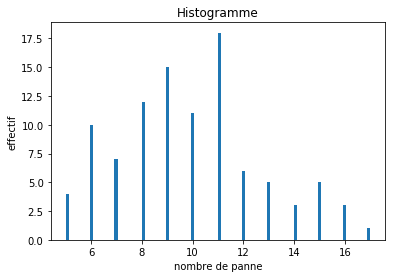

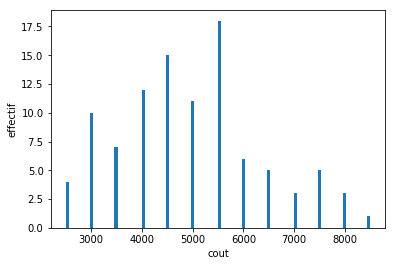

In [19]:
def histo(nb_panne,cout):
    plt.hist(nb_panne,bins=100)
    plt.xlabel('nombre de panne')
    plt.ylabel('effectif')
    plt.title('Histogramme')
    plt.show()
    plt.hist(cout,bins=100)
    plt.xlabel('cout')
    plt.ylabel('effectif')
    plt.show()
    
histo(liste_nb_panne,liste_cout)

## Questions
- Granularité en temps: mois, semaine, jour?
- La probabilité d'avoir un incident augmente-t-elle avec le temps?
- Indépendance des incidents?
- Qu'entraîne la réparation sur la possibilité d'avoir un autre accident?
- Le coût d'un incident est-il toujours exactt? ou peut être aléatoire? ( gaussien ? )
